# 6. Reinforcement Learning

Gdy nie mamy potrzeby/możliwości zbudowania uniwersalnego modelu, możemy nauczyć się dokładnej instrukcji działania do rozwiązania danego problemu. Podejmując na początku losowe decyzje, nagradzamy te, które prowadzą do lepszego rozwiązania. Jednym z dostępnych algorytmów w Reinforcement Learning jest Q-learning. Bazuje on na równaniu Bellmana:
 $$Q(s,a) = (1-\alpha )Q(s,a) + \alpha(reward + \gamma(max(Q(s_{new},:)))$$

Q w tym przypadku to tablica 100x4 (100 pól, 4 akcje - góra, lewo, dół, prawo), reward to wypłata po zagraniu wybranego ruchu, a parametry alfa i gamma to odpowiednio learning rate i discount rate (jak ważna jest sama perspektywa dobrej wypłaty) mieszczące się w przedziale (0,1).

## Zadanie I. Znajdź optymalne wyjście z labiryntu.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
maze = np.array([[0., 0, 0, 0,-1,-1, 0, 0, 0,-1],
                 [ 0,-1, 0, 0,-1, 0, 0,-1, 0,-1],
                 [ 0, 0,-1,-1,-1, 0,-1,-1, 0, 0],
                 [-1, 0, 0, 0,-1, 0, 0, 0,-1, 0],
                 [ 0,-1,-1, 0,-1, 0,-1, 0,-1, 0],
                 [ 0, 0,-1, 0, 0,-1, 0, 0, 0, 0],
                 [ 0,-1,-1,-1, 0, 0,-1, 0,-1, 0],
                 [ 0, 0, 0, 0, 0,-1, 0, 0,-1, 0],
                 [ 0,-1,-1,-1,-1, 0,-1, 0,-1, 0],
                 [ 0, 0, 0, 0, 0, 0, 0, 0,-1, 1]])


In [ ]:
def draw(maze):
  ax = plt.gca()
  ax.set_xticks(np.arange(0.5, len(maze), 1))
  ax.set_yticks(np.arange(0.5, len(maze[0]), 1))
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  img = plt.imshow(maze, cmap='seismic')
  plt.grid('on')

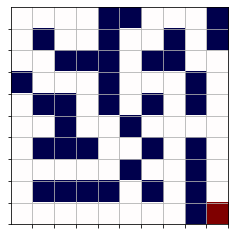

In [ ]:
draw(maze)

In [ ]:
Q = np.zeros((100,4))
l_r = 0.5
gamma = 0.5
i =0
epochs = 1000

for m in range(epochs):
  k = 0
  j = 0

  for loop in range(1000):

    direction = random.randint(0, 3)
    # 0 - UP
    # 1 - RIGHT
    # 2 - DOWN
    # 3 - LEFT

    if direction == 0:
      k = k-1
      if k == -1 or maze[k][j] == -1:
        k = k + 1
        gain = -1
      else:
        gain = maze[k][j]
      i_next = k * 10 + j
      Q[i][direction] = (1-l_r) * Q[i][direction] + l_r  * (gain + gamma * max(Q[i_next]))

    elif direction == 1:
      j = j+1
      if j == 10 or maze[k][j] == -1:
        j = j-1
        gain = -1
      else:
        gain = maze[k][j]
      i_next = k * 10 + j
      Q[i][direction] = (1-l_r) * Q[i][direction] + l_r * (gain + gamma * max(Q[i_next]))

    elif direction == 2:
      k = k+1
      if k == 10 or maze[k][j] == -1:
        k = k-1
        gain = -1
      else:
        gain = maze[k][j]
      i_next = k * 10 + j
      Q[i][direction] = (1-l_r) * Q[i][direction] + l_r *  (gain + gamma * max(Q[i_next]))

    elif direction == 3:
      j = j-1
      if j == -1 or maze[k][j] == -1:
        j = j + 1
        gain = -1
      else: 
        gain = maze[k][j]
      i_next = k * 10 + j
      Q[i][direction] = (1-l_r) * Q[i][direction] + l_r * (gain + gamma * max(Q[i_next]))

    i = i_next

    if maze[k][j] == 1:
      break

In [ ]:
max_table = []
index = 0

for i in range(1000):

  if index >= 99:
    break
  
  max_table.append(np.argmax(Q[index]))

  if(np.argmax(Q[index]) == 0):
      index = index - 10
  elif(np.argmax(Q[index]) == 1):
      index = index + 1
  elif(np.argmax(Q[index]) == 2):
      index = index + 10
  elif(np.argmax(Q[index]) == 3):
      index = index - 1


In [ ]:
def print_maze_escape(seq):
  directions = []
  for i in seq:
    if i == 0:
      directions.append("UP")
    if i == 1:
      directions.append("RIGHT")
    if i == 2:
      directions.append("DOWN")
    if i == 3:
      directions.append("LEFT")
  print(directions)

PATH
['DOWN', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'UP', 'UP', 'UP', 'UP', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'DOWN']

MAZE


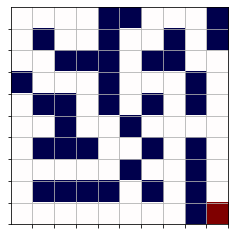

In [ ]:
print("PATH")
print_maze_escape(max_table)
print()
print("MAZE")
draw(maze)